# Task 3

For this task, we'll use the pretrained vectors from Spacy (https://spacy.io/). The `en_core_web_md` model is a medium-sized SpaCy model containing word vectors based on the GloVe algorithm for calculating word embeddings. We'll be using that to calculate similarity.

In [22]:
# !pip install spacy
# !python -m spacy download en_core_web_md

In [7]:
import numpy as np
from scipy.spatial import distance
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

We'll first calculate cosine similarity. For dissmilarity, We'll attempt multiple metrics. Namely
- Simple process of 1 - cosine_similarity
- Manhattan Distance : Calculates the sum of absolute differences between vectors in a 'city block' grid. It's sensitive to outliers.
- Chebyshev dissimilarity measures the maximum absolute difference between elements of the vectors, capturing the greatest single element difference.

In [8]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [16]:
def calculate_similarity_and_dissimilarity(word1, word2, verbose=False):
    nlp = spacy.load('en_core_web_md')
    
    vec1 = nlp.vocab[word1].vector
    vec2 = nlp.vocab[word2].vector
    
    if not vec1.any() or not vec2.any():
        return None, None, None, None  # Skip if one of the words is not found

    
    similarity = cosine_similarity(vec1, vec2)

    dissimilarity_cosine = 1 - cosine_similarity(vec1, vec2)
    dissimilarity_manhattan = distance.cityblock(vec1, vec2)
    dissimilarity_chebyshev = distance.chebyshev(vec1, vec2)

    if verbose:
        print(f"Cosine Similarity: {similarity}\n")
        print(f"Cosine Dissimilarity: {dissimilarity_cosine}")
        print(f"Manhattan Dissimilarity: {dissimilarity_manhattan}")
        print(f"Chebyshev Dissimilarity: {dissimilarity_chebyshev}")

    return similarity, dissimilarity_cosine, dissimilarity_manhattan, dissimilarity_chebyshev

One simple application

In [17]:
word1 = "apple"
word2 = "tree"
calculate_similarity_and_dissimilarity(word1, word2, verbose=True)

Cosine Similarity: 0.47485122084617615

Cosine Dissimilarity: 0.5251487791538239
Manhattan Dissimilarity: 825.499267578125
Chebyshev Dissimilarity: 11.658599853515625


(0.47485122, 0.5251487791538239, 825.49927, 11.6586)

To better visualise these metrics, we'll create one sample list of various words, and then create a heatmap for comparisons between each pair of words in list. 

In [14]:
words = ["apple", "orange", "banana", "airplane", "car", "bike", "river", "mountain", "ocean", "city"]
n = len(words)

In [18]:
similarity_matrix = np.zeros((n, n))
dissimilarity_cosine_matrix = np.zeros((n, n))
dissimilarity_manhattan_matrix = np.zeros((n, n))
dissimilarity_chebyshev_matrix = np.zeros((n, n))

# Calculate similarities and dissimilarities
for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        sim, d_cos, d_man, d_cheb = calculate_similarity_and_dissimilarity(word1, word2)
        similarity_matrix[i, j] = sim
        dissimilarity_cosine_matrix[i, j] = d_cos
        dissimilarity_manhattan_matrix[i, j] = d_man
        dissimilarity_chebyshev_matrix[i, j] = d_cheb

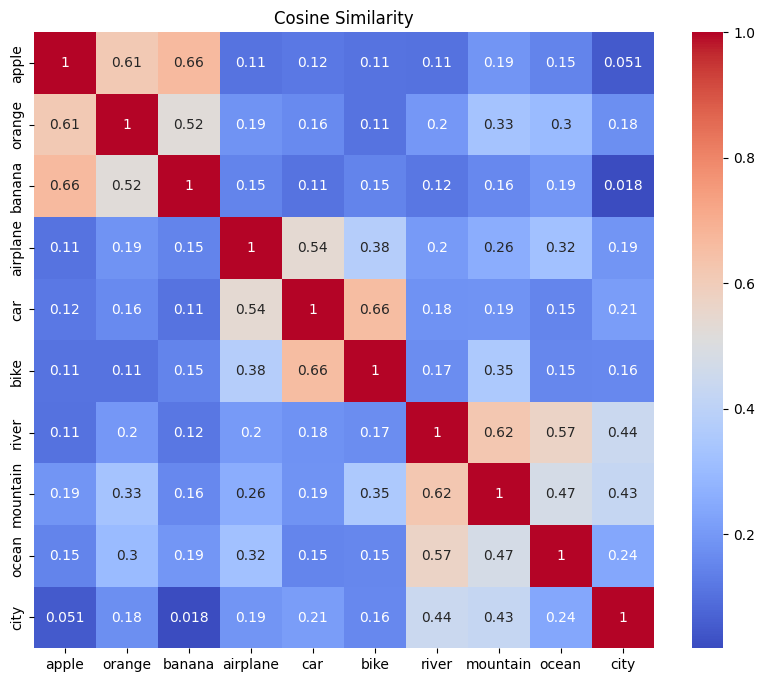

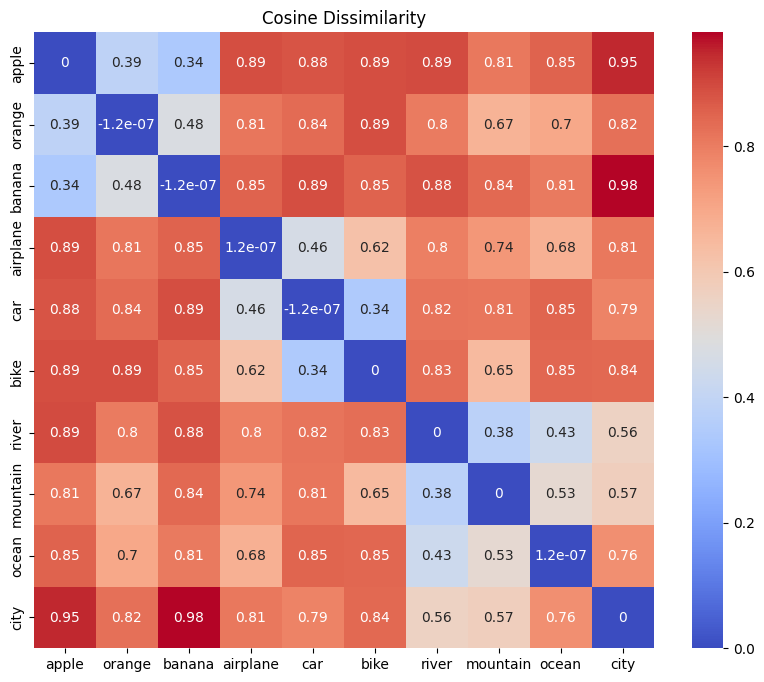

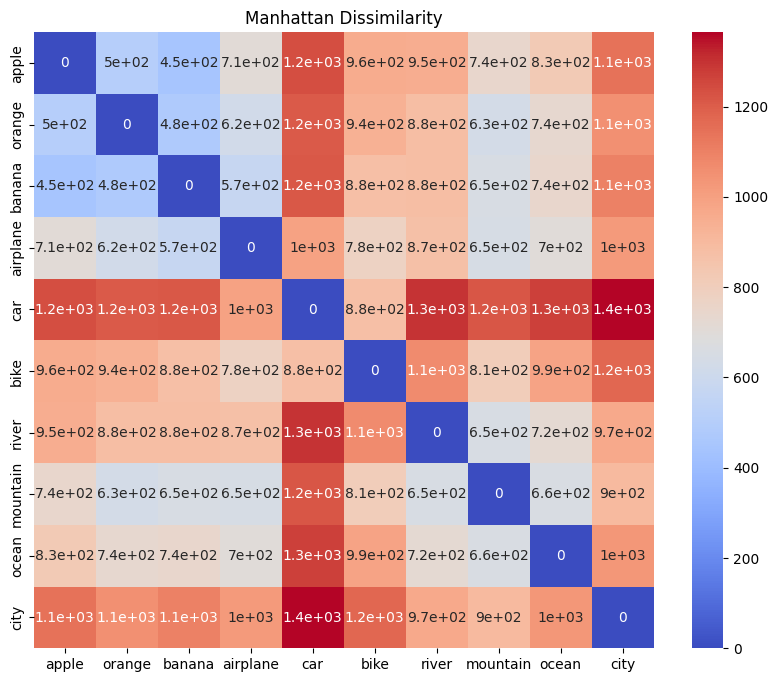

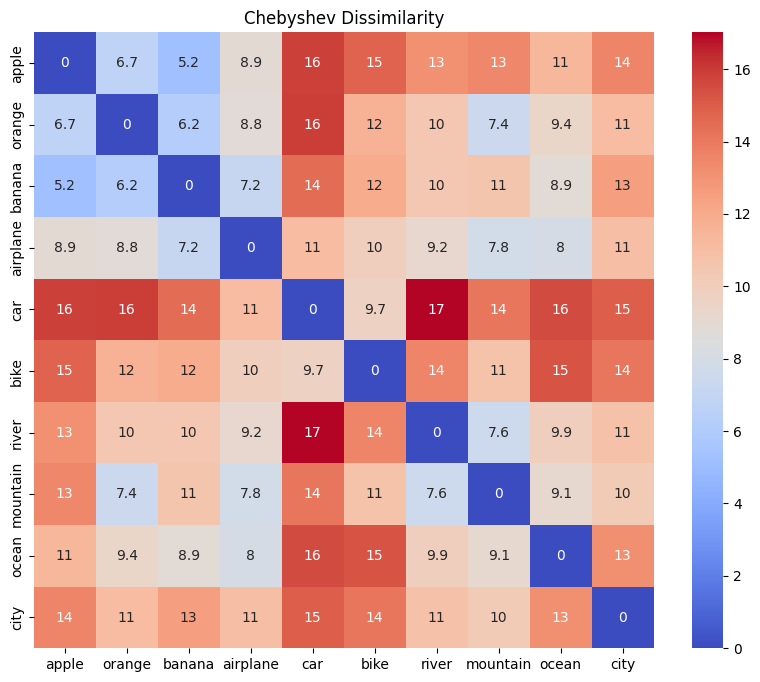

In [21]:
def plot_heatmap(matrix, title, words):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, xticklabels=words, yticklabels=words, cmap="coolwarm")
    plt.title(title)
    plt.show()

# Plotting
plot_heatmap(similarity_matrix, "Cosine Similarity", words)
plot_heatmap(dissimilarity_cosine_matrix, "Cosine Dissimilarity", words)
plot_heatmap(dissimilarity_manhattan_matrix, "Manhattan Dissimilarity", words)
plot_heatmap(dissimilarity_chebyshev_matrix, "Chebyshev Dissimilarity", words)

We can see the expected patterns through these measure. 
- For example, banana, apple and orange tend to form a cluster on their own (fruits).
- Other patterns include car and river being far away (in chebyshev and manhattan distance), 'city' and 'banana' being far away in cosine measure.
- River and mountain interestingly are close to each other, which is particulary visible in cosine dissimlarity. 